## Analyse Benchmark Testbed

In [145]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg

import os
import json
import glob
import pickle



JOBCENTRIC = False



# DATA_NAME = 'social_media_cloud_k_4_L_2_n_4_chancap500_numchans1_mldat2e6_bidirectional'
DATA_NAME = 'commercial_cloud_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional'
# DATA_NAME = 'jobcentric_prototyping_k_4_L_2_n_16_chancap1_numchans1_mldat3e3_bidirectional'


# path_to_benchmark_data = '/scratch/datasets/trafpy/management/flowcentric/{}_testbed_data_v3.obj'.format(DATA_NAME)
# path_to_testbed_data = '/scratch/datasets/trafpy/management/flowcentric/{}_slotsize_1000.0_testbed_data'.format(DATA_NAME)
path_to_testbed_data = '/rdata/ong/trafpy/management/flowcentric/{}_slotsize_1000.0_testbed_data'.format(DATA_NAME)
# path_to_testbed_data = '/rdata/ong/trafpy/management/jobcentric/{}_slotsize_10.0_testbed_data'.format(DATA_NAME)


if os.path.isdir(path_to_testbed_data):
    # data split into separate files in a directory
    separate_files = True
    # load paths to testbed data dirs
    testbed_data_list = sorted(glob.glob(path_to_testbed_data + '/*'))
    print(testbed_data_list)
    envs = []
    for testbed_path in testbed_data_list:
        try:
            filehandler = open(testbed_path+'/simulation.obj', 'rb')
            envs.append(pickle.load(filehandler))
        except FileNotFoundError:
            print('No simulation.obj in {}'.format(testbed_path))
        
else:
    # all data stored in single file
    separate_files = False
    # load raw testbed data
    filehandler = open(path_to_testbed_data, 'rb')
    testbed_data = pickle.load(filehandler)
    print(testbed_data.keys())
    # unpack env dicts into list of env objects
    envs = testbed_data['envs']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['/rdata/ong/trafpy/management/flowcentric/commercial_cloud_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_commercial_load_0.1_repeat_0_scheduler_FF', '/rdata/ong/trafpy/management/flowcentric/commercial_cloud_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_commercial_load_0.1_repeat_0_scheduler_FS', '/rdata/ong/trafpy/management/flowcentric/commercial_cloud_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_commercial_load_0.1_repeat_0_scheduler_Rand', '/rdata/ong/trafpy/management/flowcentric/commercial_cloud_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_commercial_load_0.1_repeat_0_scheduler_SRPT', '/rdata/ong/trafpy/management/flowcentric/commercial_cloud_k_4_L_2_n_16_chancap1250_numchans1_mldat

In [146]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter

import os

# analyse
analysers = [EnvAnalyser(env, time_units='\u03BCs', info_units='B', subject_class_name=env.scheduler.scheduler_name) for env in envs]
for analyser in analysers:
    env_analyser_database_path = path_to_testbed_data+'/'+analyser.env.sim_name
    analyser.compute_metrics(measurement_start_time='auto', # 'auto' None
                             measurement_end_time='auto', # 'auto' None
                             env_analyser_database_path=env_analyser_database_path,
                             overwrite=False,
                             print_summary=True)


Computing metrics for env benchmark_commercial_load_0.1_repeat_0_scheduler_FF...
/rdata/ong/trafpy/management/flowcentric/commercial_cloud_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_commercial_load_0.1_repeat_0_scheduler_FF/env_analyser_database exists and overwrite is False. Loading previously completed analysis...
Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/commercial_cloud_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_commercial_load_0.1_repeat_0_scheduler_FF/env_analyser_database in 0.6756064891815186 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_commercial_load_0.1_repeat_0_scheduler_FF'
Measurement duration: 703174.3688748925 μs (Start time : 77825.63112510752 μs | End time: 781000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 135916
Total info arrived:

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/commercial_cloud_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_commercial_load_0.2_repeat_0_scheduler_FF/env_analyser_database in 0.47016429901123047 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_commercial_load_0.2_repeat_0_scheduler_FF'
Measurement duration: 347677.62288747396 μs (Start time : 38322.37711252606 μs | End time: 386000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 135916
Total info arrived: 2763012102.0 B
Total info transported: 2735197077.0 B
Load (abs): 7947.051866764086 B/μs
Load (frac): 0.19867629666910216 fraction of network capacity requested.
Throughput (abs): 7867.049522152445 B/μs
Throughput (frac): 0.9899330788381758 fraction of arrived info successfully transported.
T-Score: -44.76974846722021

 ~* Flow Information *~
Total number of generated f

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/commercial_cloud_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_commercial_load_0.3_repeat_0_scheduler_FS/env_analyser_database in 0.78159499168396 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_commercial_load_0.3_repeat_0_scheduler_FS'
Measurement duration: 450203.27541660564 μs (Start time : 49796.724583394374 μs | End time: 500000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 271832
Total info arrived: 5381499453.0 B
Total info transported: 5328178328.0 B
Load (abs): 11953.488006101486 B/μs
Load (frac): 0.2988372001525372 fraction of network capacity requested.
Throughput (abs): 11835.050118348097 B/μs
Throughput (frac): 0.9900917717328253 fraction of arrived info successfully transported.
T-Score: -9.980717709923873

 ~* Flow Information *~
Total number of generated fl

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/commercial_cloud_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_commercial_load_0.4_repeat_0_scheduler_Rand/env_analyser_database in 0.6577510833740234 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_commercial_load_0.4_repeat_0_scheduler_Rand'
Measurement duration: 327841.75031245465 μs (Start time : 36158.24968754536 μs | End time: 364000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 271832
Total info arrived: 5187580948.0 B
Total info transported: 4656822319.0 B
Load (abs): 15823.429880592987 B/μs
Load (frac): 0.3955857470148247 fraction of network capacity requested.
Throughput (abs): 14204.48223742627 B/μs
Throughput (frac): 0.8976866801076855 fraction of arrived info successfully transported.
T-Score: -250.5357066163153

 ~* Flow Information *~
Total number of generate

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/commercial_cloud_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_commercial_load_0.5_repeat_0_scheduler_SRPT/env_analyser_database in 0.853522539138794 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_commercial_load_0.5_repeat_0_scheduler_SRPT'
Measurement duration: 293658.53964995226 μs (Start time : 32341.460350047757 μs | End time: 326000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 271832
Total info arrived: 5856296951.0 B
Total info transported: 5464410076.0 B
Load (abs): 19942.53924296171 B/μs
Load (frac): 0.49856348107404275 fraction of network capacity requested.
Throughput (abs): 18608.04076228705 B/μs
Throughput (frac): 0.9330828203762648 fraction of arrived info successfully transported.
T-Score: -50.036215331725884

 ~* Flow Information *~
Total number of generat

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/commercial_cloud_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_commercial_load_0.7_repeat_0_scheduler_FF/env_analyser_database in 1.5819571018218994 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_commercial_load_0.7_repeat_0_scheduler_FF'
Measurement duration: 393586.9516856956 μs (Start time : 43413.04831430438 μs | End time: 437000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 543664
Total info arrived: 10951757299.0 B
Total info transported: 9818943947.0 B
Load (abs): 27825.5090827952 B/μs
Load (frac): 0.69563772706988 fraction of network capacity requested.
Throughput (abs): 24947.330964470224 B/μs
Throughput (frac): 0.8965633257684192 fraction of arrived info successfully transported.
T-Score: -1865.5837270005231

 ~* Flow Information *~
Total number of generated flow

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/commercial_cloud_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_commercial_load_0.8_repeat_0_scheduler_FS/env_analyser_database in 1.446918249130249 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_commercial_load_0.8_repeat_0_scheduler_FS'
Measurement duration: 352140.26083746605 μs (Start time : 38859.73916253397 μs | End time: 391000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 543664
Total info arrived: 11186169139.0 B
Total info transported: 10111597414.0 B
Load (abs): 31766.231763436703 B/μs
Load (frac): 0.7941557940859175 fraction of network capacity requested.
Throughput (abs): 28714.687124819025 B/μs
Throughput (frac): 0.9039374685249876 fraction of arrived info successfully transported.
T-Score: -182.41509606839838

 ~* Flow Information *~
Total number of generated

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/commercial_cloud_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_commercial_load_0.9_repeat_0_scheduler_Rand/env_analyser_database in 1.466961145401001 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_commercial_load_0.9_repeat_0_scheduler_Rand'
Measurement duration: 315252.087933311 μs (Start time : 34747.91206668902 μs | End time: 350000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 543664
Total info arrived: 11243885904.0 B
Total info transported: 6173865656.0 B
Load (abs): 35666.3328630469 B/μs
Load (frac): 0.8916583215761724 fraction of network capacity requested.
Throughput (abs): 19583.900923460435 B/μs
Throughput (frac): 0.5490864731919464 fraction of arrived info successfully transported.
T-Score: -5376.10228112814

 ~* Flow Information *~
Total number of generated fl

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:432: UserWarning: no number provided, assuming zero (0)
  warn('no number provided, assuming zero (0)')
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))




Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT (\$\textbackslash mu\$s) &  p99 FCT (\$\textbackslash mu\$s) &  Max FCT (\$\textbackslash mu\$s) &  Throughput (Frac) &  Flows Dropped (Frac) &  Info Dropped (Frac) \\
\midrule
 0.10 &    SRPT &             1517.1 &            1997.2 &           53330.4 &           0.998277 &              0.000008 &              0.00172 \\
 0.10 &      FS &             1518.5 &            1996.7 &           51330.4 &           0.998277 &              0.000008 &              0.00172 \\
 0.10 &      FF &             1580.1 &            3535.7 &           62780.0 &           0.997143 &              0.000041 &              0.00286 \\
 0.10 &    Rand &             1549.4 &            2797.8 &           90780.0 &           0.993502 &              0.000065 &              0.00650 \\
 0.20 &    SRPT &             1524.2 &            2274.1 &           95812.9 &           0.989970 &              0.000033 &              0.01000 

,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput Frac,Frac Flows Dropped,Frac Info Dropped
0,0.10,SRPT,-0.203968,1517.1,1997.2,53330.4,0.998277,0.000008,0.00172
1,0.10,FS,-0.231612,1518.5,1996.7,51330.4,0.998277,0.000008,0.00172
2,0.10,FF,-6.919297,1580.1,3535.7,62780.0,0.997143,0.000041,0.00286
3,0.10,Rand,-11.843611,1549.4,2797.8,90780.0,0.993502,0.000065,0.00650
4,0.20,SRPT,-5.112242,1524.2,2274.1,95812.9,0.989970,0.000033,0.01000
5,0.20,FS,-5.115197,1523.1,1998.7,71812.9,0.989970,0.000033,0.01000
6,0.20,Rand,-28.286378,1598.0,3272.9,117469.7,0.967960,0.000147,0.03200
7,0.20,FF,-44.769748,1777.9,8826.9,63606.0,0.989933,0.000229,0.01010
8,0.30,FS,-9.980718,1534.8,2062.7,70253.7,0.990092,0.000057,0.00991
9,0.30,SRPT,-14.909415,1540.1,2656.3,88253.7,0.991439,0.000081,0.00856


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput Frac,Frac Flows Dropped,Frac Info Dropped
0,0.10,SRPT,FS,FS,SRPT+FS,SRPT+FS,SRPT+FS
1,0.20,FS,FS,FF,SRPT+FS,SRPT+FS,SRPT+FS
2,0.30,FS,FS,FS,SRPT,FS,SRPT
3,0.40,FS,FS,FS,FS,FS,FS
4,0.50,FS,FS,FF,FS,SRPT,FS
5,0.60,SRPT,SRPT,FS,FS,SRPT,FS
6,0.70,FS,SRPT,FS,FS,SRPT,FS
7,0.79,FS,SRPT,FS,FS,SRPT,FS
8,0.89,FS,FS,FS,FF,FS,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput Frac,Frac Flows Dropped,Frac Info Dropped
0,0.10,SRPT(-3.987%) | FS(-3.898%) | Rand(-1.943%) | FF,FS(-43.53%) | SRPT(-43.51%) | Rand(-20.87%) | FF,FS(-43.46%) | SRPT(-41.25%) | FF(-30.84%) | Rand,FS(0.4806%) | SRPT(0.4806%) | FF(0.3665%) | Rand,SRPT(-87.5%) | FS(-87.5%) | FF(-37.52%) | Rand,SRPT(-73.54%) | FS(-73.54%) | FF(-56.0%) | Rand
1,0.20,FS(-14.33%) | SRPT(-14.27%) | Rand(-10.12%) | FF,FS(-77.36%) | SRPT(-74.24%) | Rand(-62.92%) | FF,FF(-45.85%) | FS(-38.87%) | SRPT(-18.44%) | Rand,FS(2.274%) | SRPT(2.274%) | FF(2.27%) | Rand,SRPT(-85.76%) | FS(-85.76%) | Rand(-35.81%) | FF,SRPT(-68.75%) | FS(-68.75%) | FF(-68.44%) | Rand
2,0.30,FS(-28.85%) | SRPT(-28.61%) | Rand(-21.39%) | FF,FS(-88.8%) | SRPT(-85.57%) | Rand(-75.97%) | FF,FS(-69.23%) | SRPT(-61.34%) | FF(-58.86%) | Rand,SRPT(6.646%) | FS(6.501%) | FF(5.949%) | Rand,FS(-92.09%) | SRPT(-88.71%) | Rand(-24.97%) | FF,SRPT(-87.82%) | FS(-85.9%) | FF(-78.66%) | Rand
3,0.40,FS(-43.11%) | SRPT(-42.58%) | Rand(-32.32%) | FF,FS(-90.68%) | SRPT(-89.37%) | Rand(-77.18%) | FF,FS(-67.44%) | SRPT(-57.96%) | FF(-43.67%) | Rand,FS(9.655%) | SRPT(9.343%) | FF(9.03%) | Rand,FS(-97.26%) | SRPT(-96.34%) | Rand(-68.91%) | FF,FS(-84.71%) | SRPT(-81.96%) | FF(-79.12%) | Rand
4,0.50,FS(-60.71%) | SRPT(-60.67%) | Rand(-45.75%) | FF,FS(-94.14%) | SRPT(-94.1%) | Rand(-80.0%) | FF,FF(-27.86%) | SRPT(-26.27%) | FS(-18.94%) | Rand,FS(19.09%) | SRPT(18.9%) | FF(18.07%) | Rand,SRPT(-98.09%) | FS(-97.39%) | Rand(-65.52%) | FF,FS(-69.58%) | SRPT(-68.88%) | FF(-65.86%) | Rand
5,0.60,SRPT(-71.24%) | FS(-71.06%) | Rand(-42.87%) | FF,SRPT(-95.14%) | FS(-94.67%) | Rand(-70.08%) | FF,FS(-28.88%) | FF(-17.05%) | SRPT(-17.02%) | Rand,FS(25.08%) | FF(23.45%) | SRPT(22.55%) | Rand,SRPT(-98.99%) | FS(-98.56%) | Rand(-73.2%) | FF,FS(-76.99%) | FF(-71.99%) | SRPT(-69.23%) | Rand
6,0.70,FS(-55.24%) | SRPT(-55.1%) | FF(-15.3%) | Rand,SRPT(-86.46%) | FS(-84.19%) | FF(-18.06%) | Rand,FS(-26.54%) | SRPT(-13.33%) | FF(-0.2603%) | Rand,FS(35.76%) | SRPT(33.36%) | FF(33.09%) | Rand,SRPT(-96.65%) | FS(-94.86%) | FF(-20.17%) | Rand,FS(-73.8%) | SRPT(-68.71%) | FF(-68.4%) | Rand
7,0.79,FS(-62.36%) | SRPT(-59.12%) | FF(-14.84%) | Rand,SRPT(-85.86%) | FS(-85.07%) | FF(-38.8%) | Rand,FS(-25.56%) | SRPT(-14.96%) | FF(-10.35%) | Rand,FS(47.55%) | FF(47.3%) | SRPT(41.87%) | Rand,SRPT(-95.61%) | FS(-95.36%) | FF(-62.89%) | Rand,FS(-75.17%) | FF(-74.78%) | SRPT(-66.15%) | Rand
8,0.89,FS(-71.99%) | SRPT(-66.12%) | Rand(-27.45%) | FF,FS(-80.19%) | SRPT(-77.51%) | Rand(-8.071%) | FF,FS(-17.33%) | FF(-11.67%) | SRPT(-8.369%) | Rand,FF(54.06%) | FS(52.46%) | SRPT(28.72%) | Rand,FS(-92.58%) | SRPT(-84.61%) | Rand(0.0%) | FF,FF(-65.85%) | FS(-63.86%) | SRPT(-35.03%) | Rand


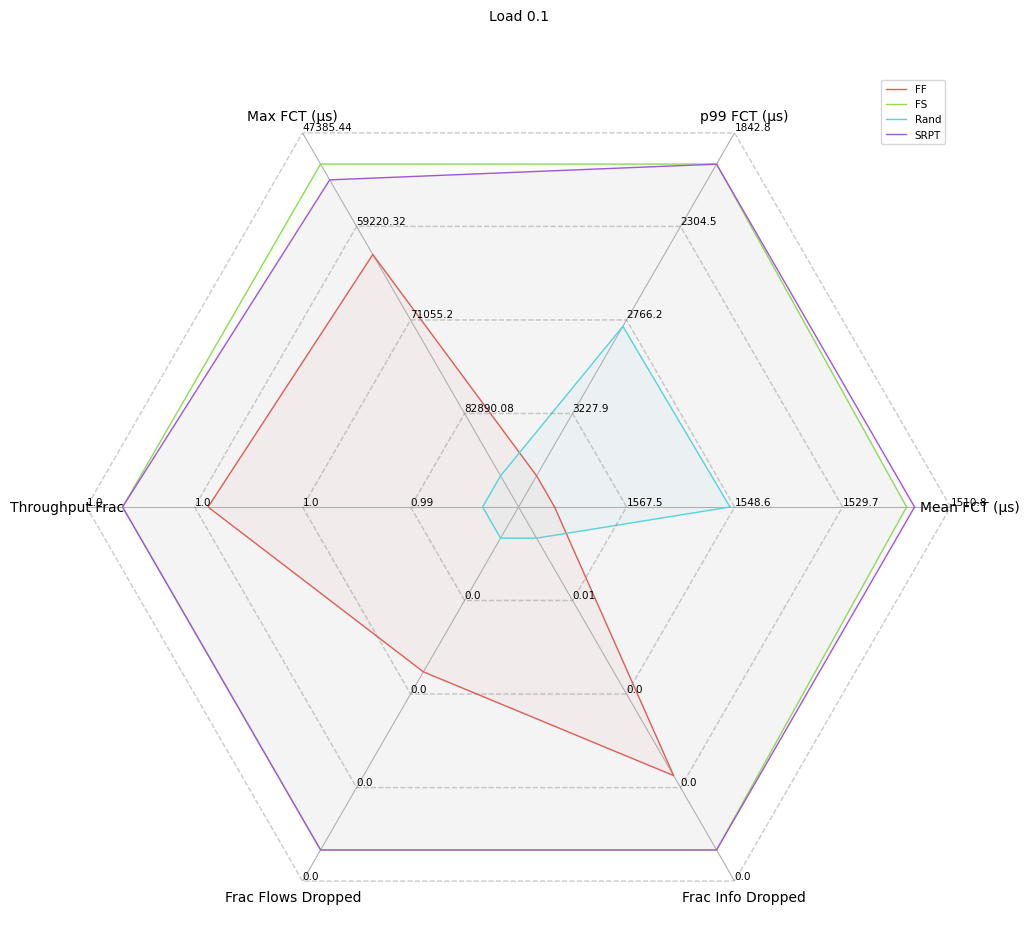

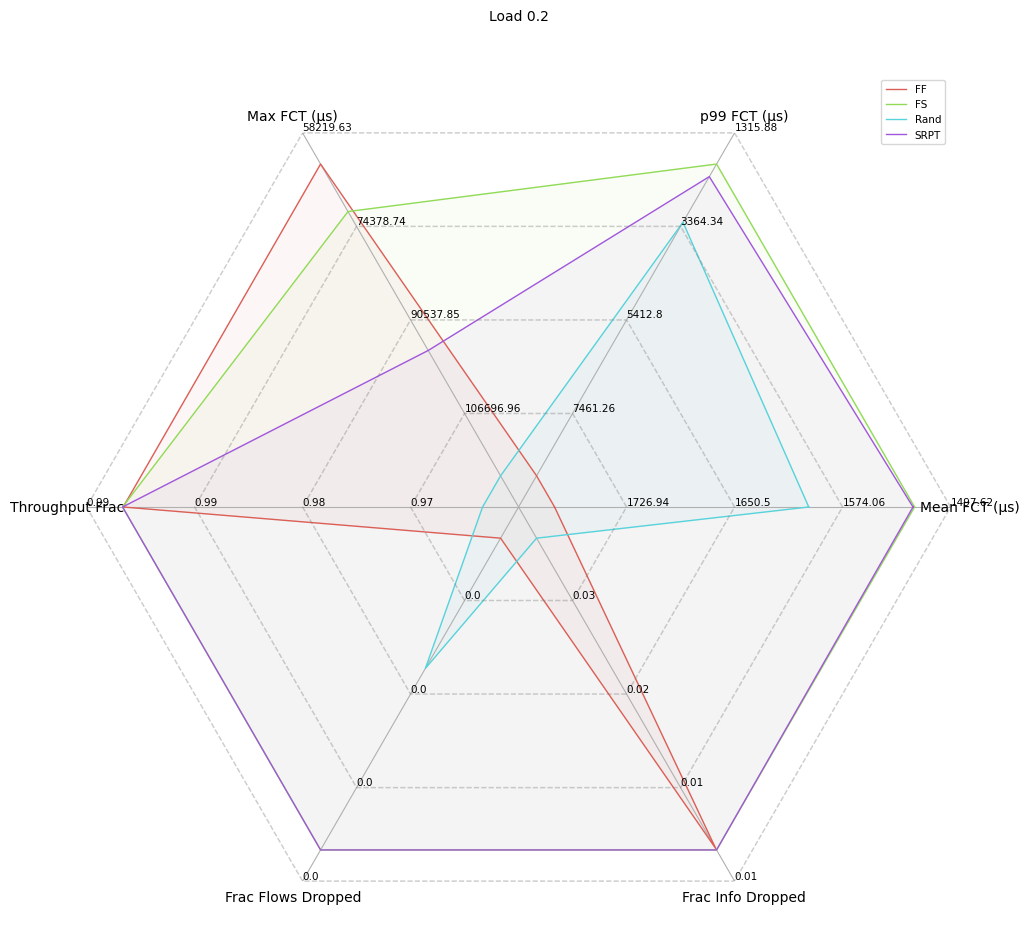

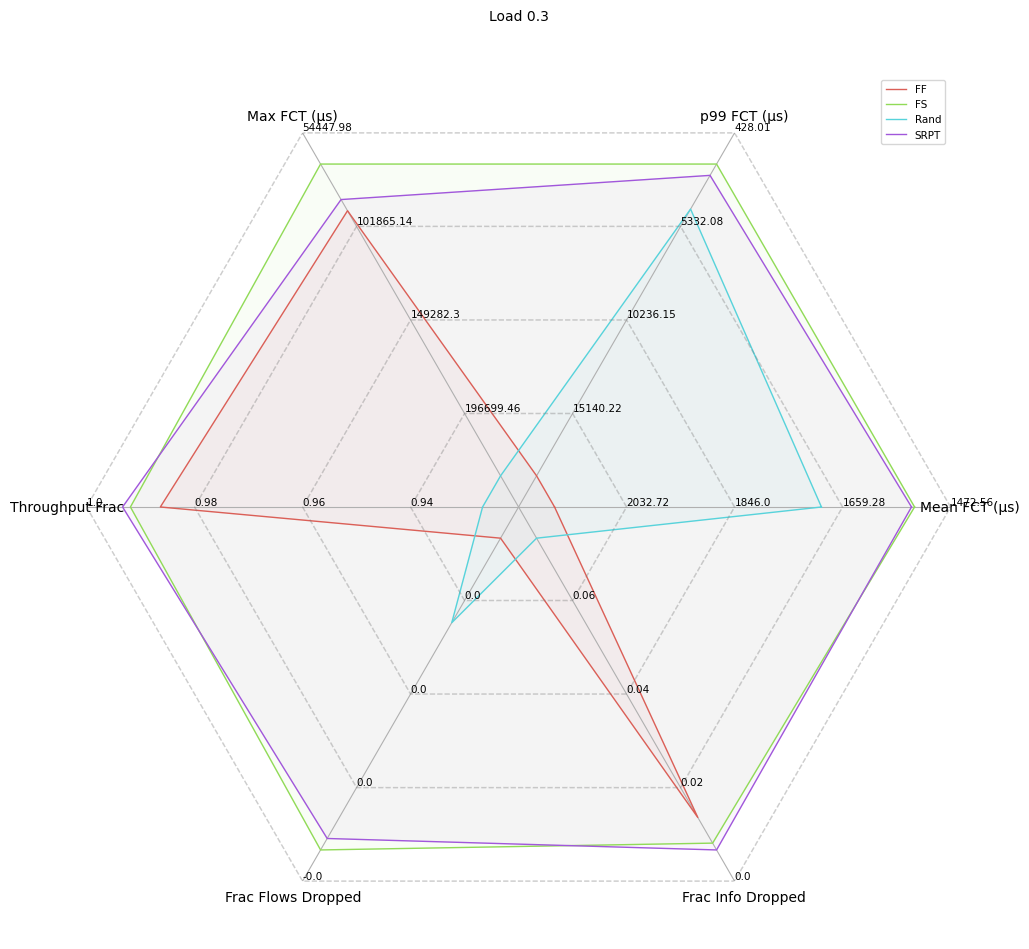

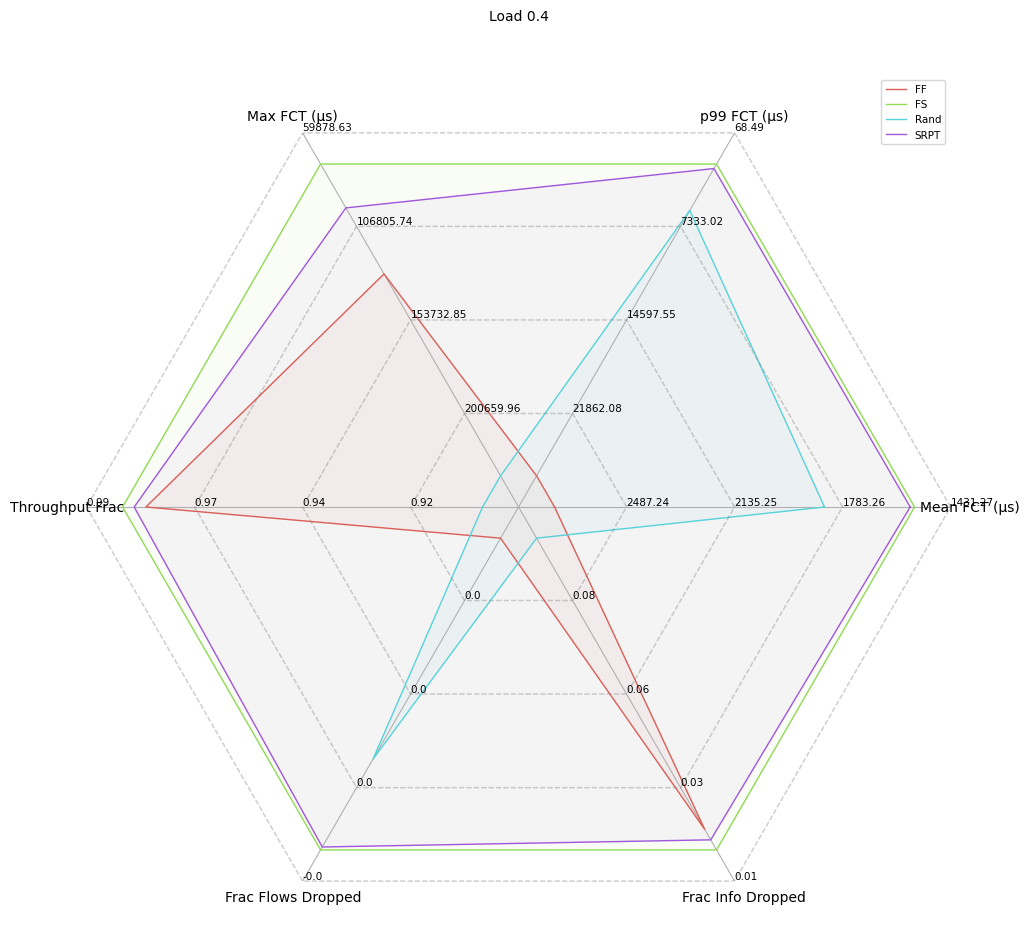

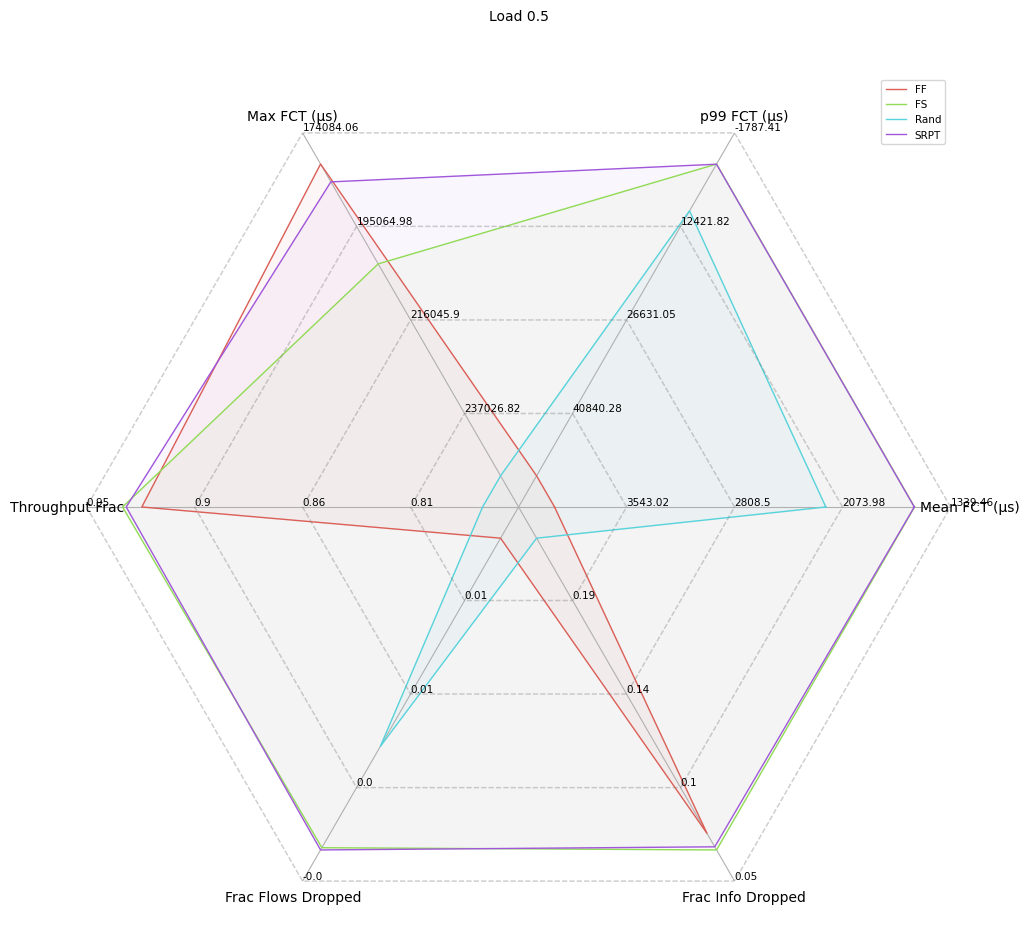

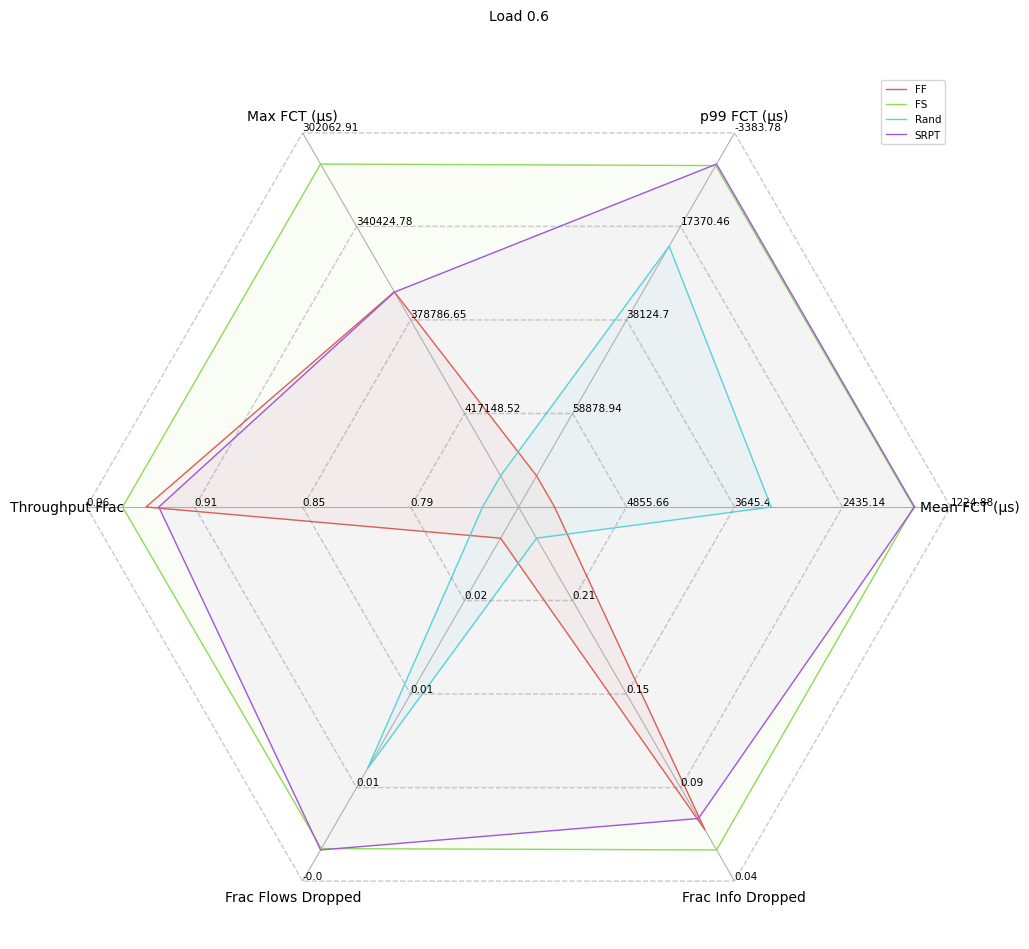

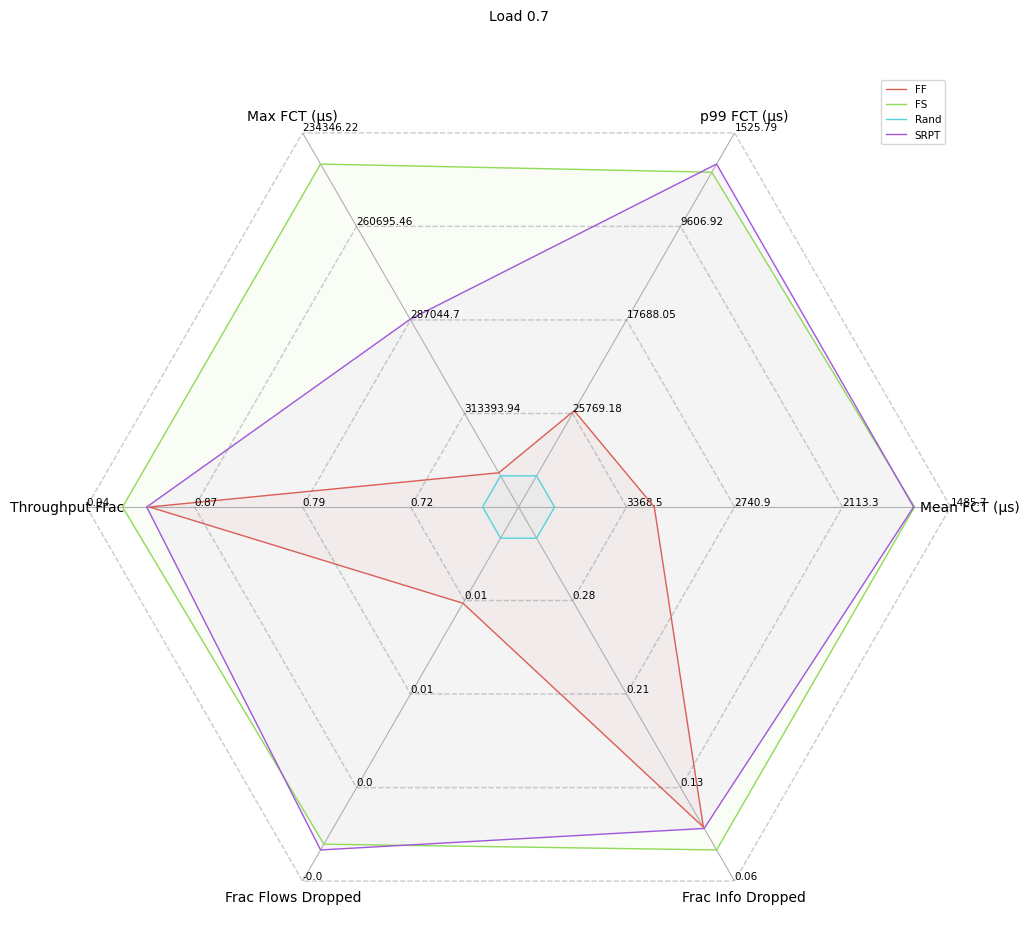

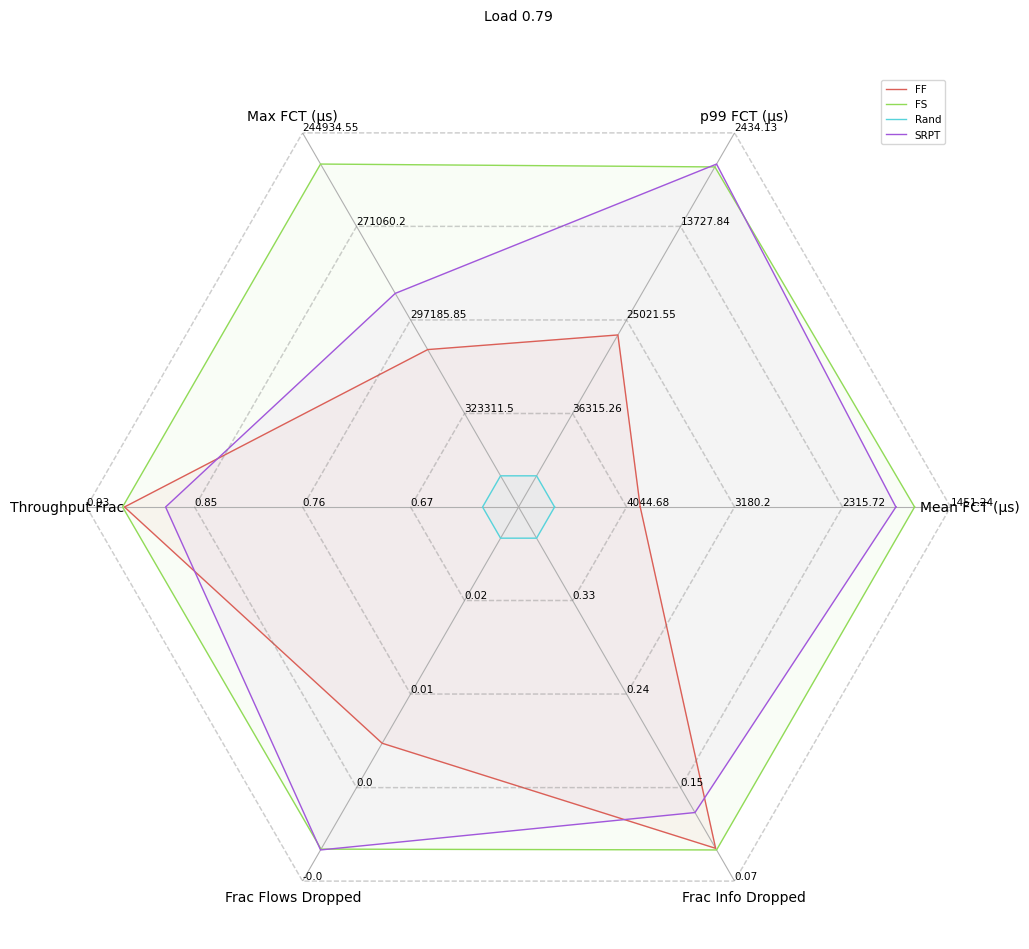

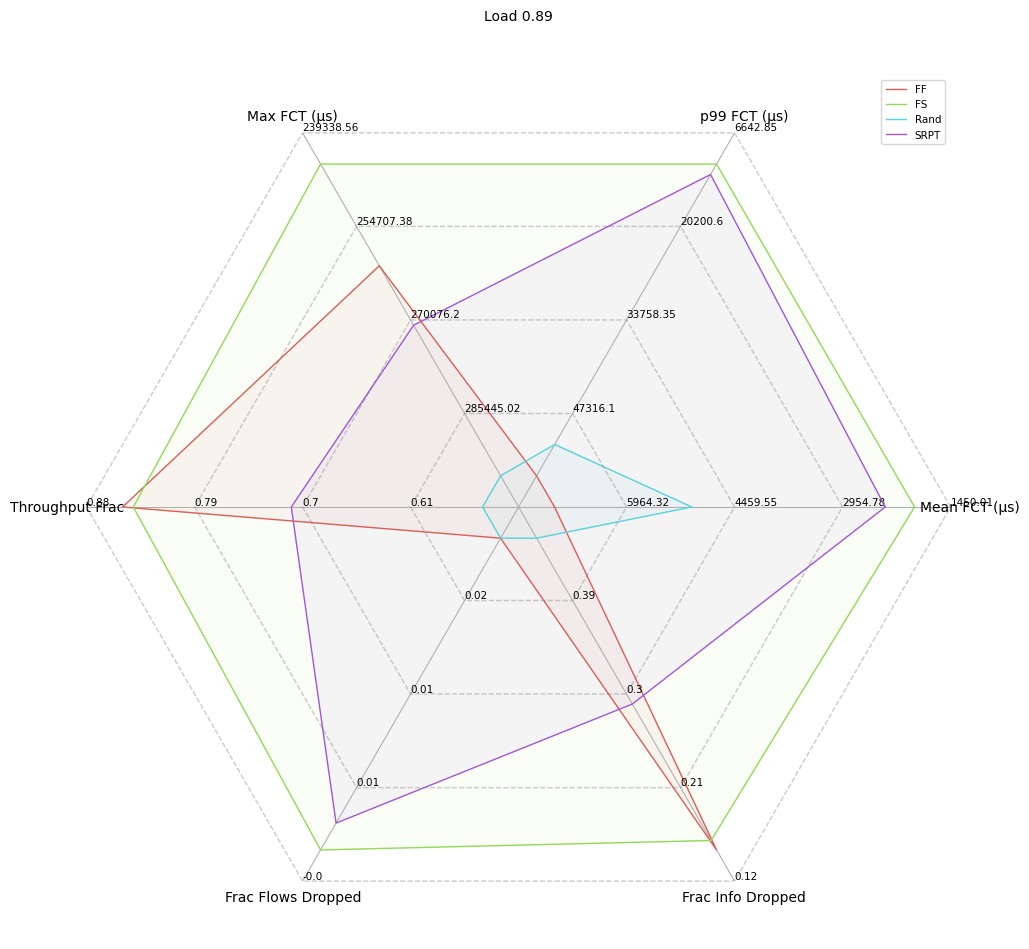

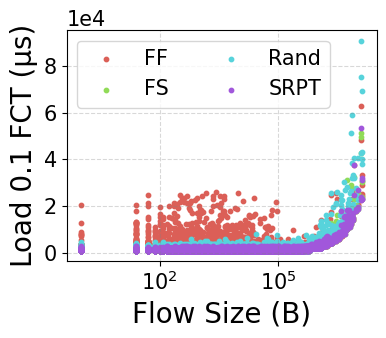

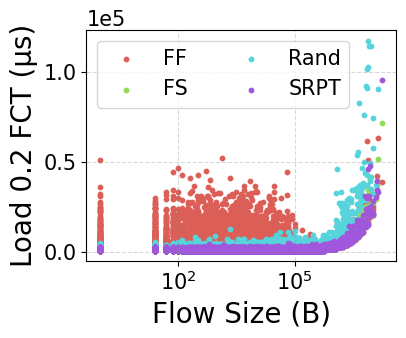

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


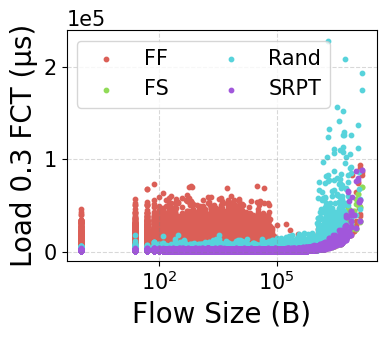

/home/zciccwf/phd_project/projects/trafpy/trafpy/manager/src/simulators/env_plotter.py:1378: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(self.path_to_save+'/demand_completion_time_vs_size_load_{}.png'.format(round(load, 2)), bbox_inches='tight')
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


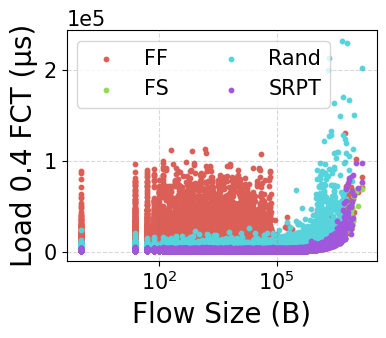

/home/zciccwf/phd_project/projects/trafpy/trafpy/manager/src/simulators/env_plotter.py:1378: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(self.path_to_save+'/demand_completion_time_vs_size_load_{}.png'.format(round(load, 2)), bbox_inches='tight')
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


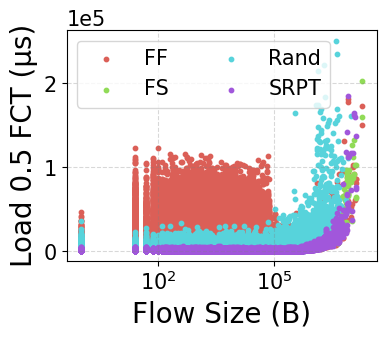

/home/zciccwf/phd_project/projects/trafpy/trafpy/manager/src/simulators/env_plotter.py:1378: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(self.path_to_save+'/demand_completion_time_vs_size_load_{}.png'.format(round(load, 2)), bbox_inches='tight')
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


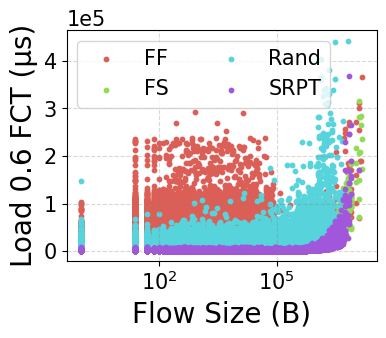

/home/zciccwf/phd_project/projects/trafpy/trafpy/manager/src/simulators/env_plotter.py:1378: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(self.path_to_save+'/demand_completion_time_vs_size_load_{}.png'.format(round(load, 2)), bbox_inches='tight')
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


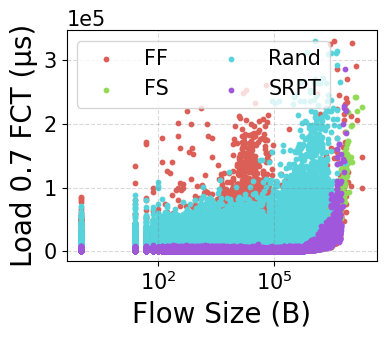

/home/zciccwf/phd_project/projects/trafpy/trafpy/manager/src/simulators/env_plotter.py:1378: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(self.path_to_save+'/demand_completion_time_vs_size_load_{}.png'.format(round(load, 2)), bbox_inches='tight')
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


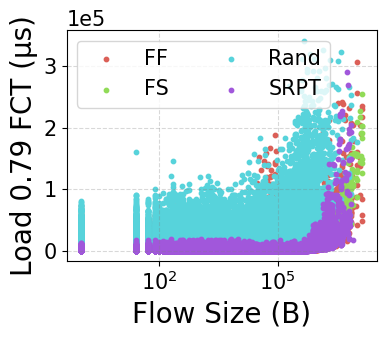

/home/zciccwf/phd_project/projects/trafpy/trafpy/manager/src/simulators/env_plotter.py:1378: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(self.path_to_save+'/demand_completion_time_vs_size_load_{}.png'.format(round(load, 2)), bbox_inches='tight')
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


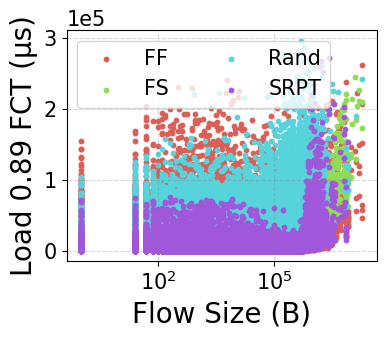

/home/zciccwf/phd_project/projects/trafpy/trafpy/manager/src/simulators/env_plotter.py:1378: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(self.path_to_save+'/demand_completion_time_vs_size_load_{}.png'.format(round(load, 2)), bbox_inches='tight')


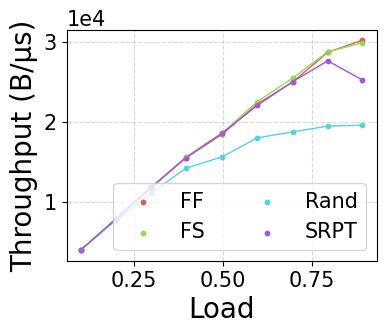

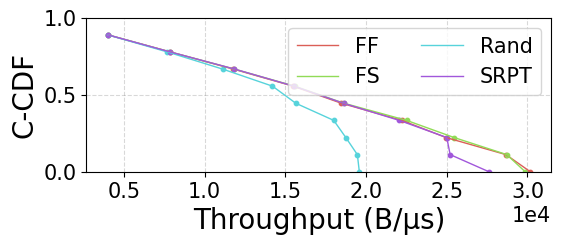

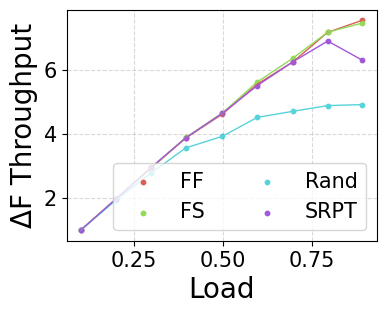

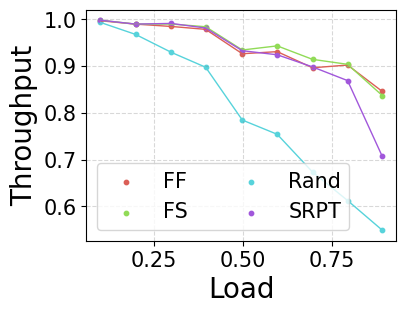

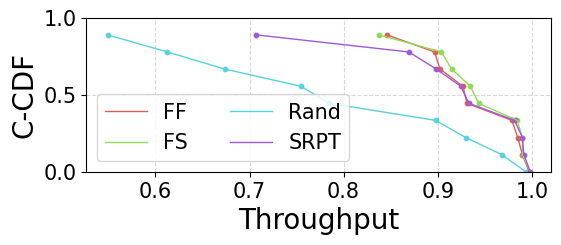

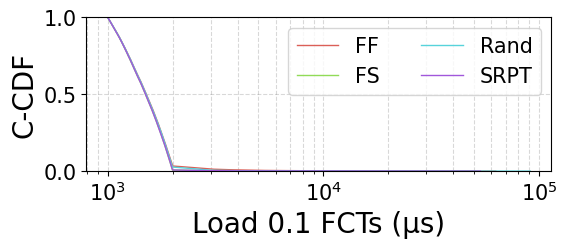

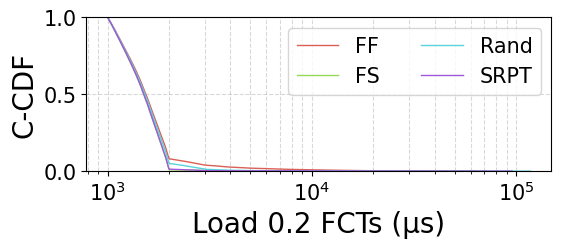

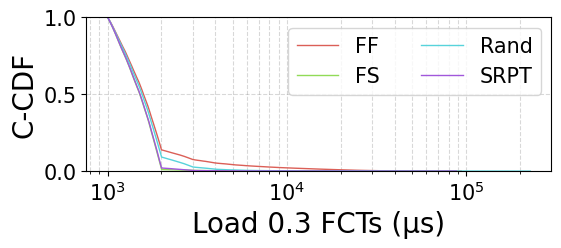

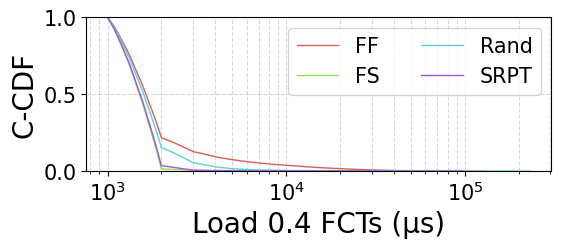

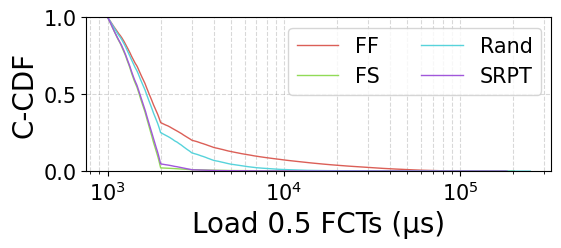

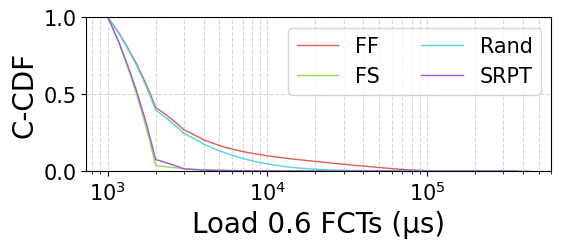

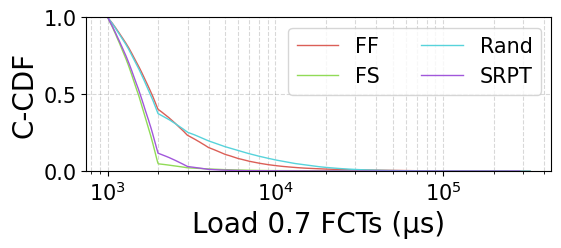

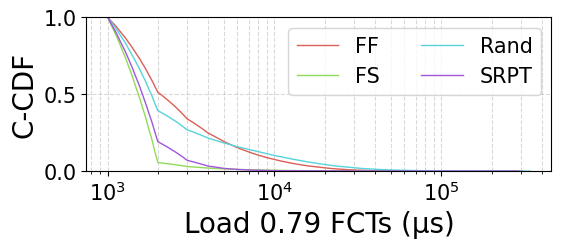

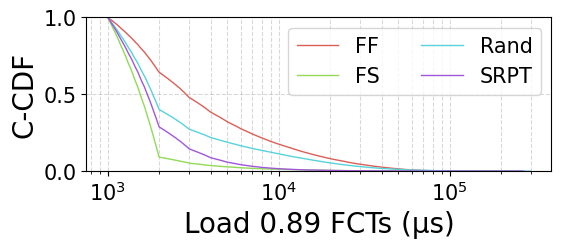

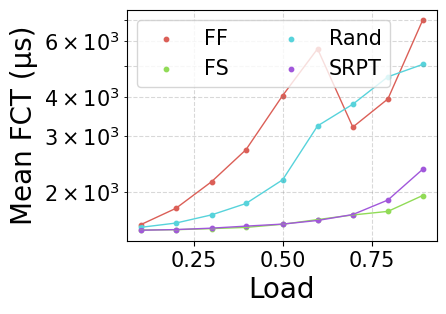

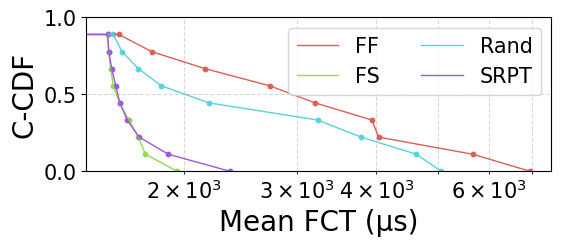

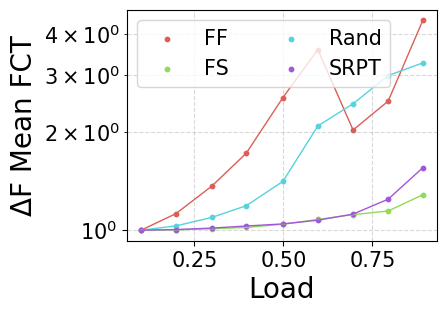

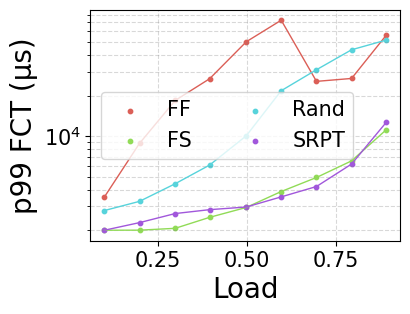

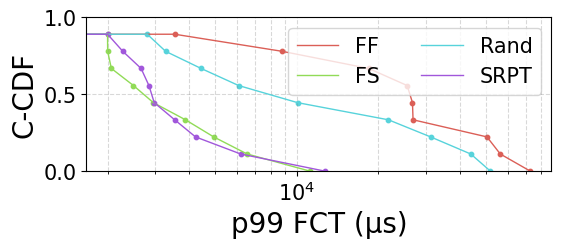

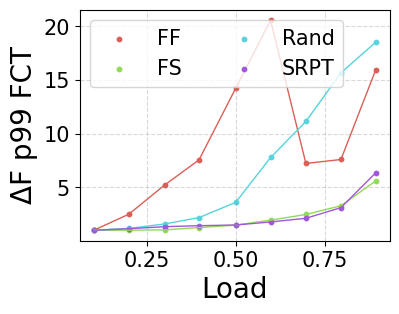

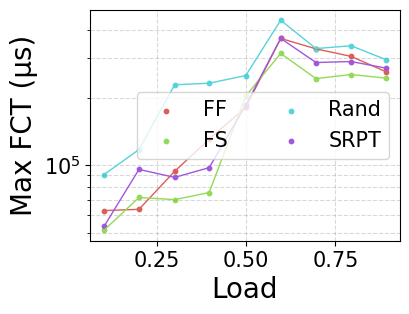

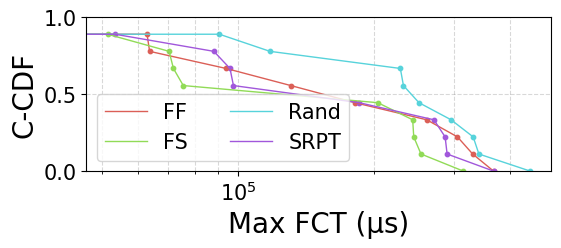

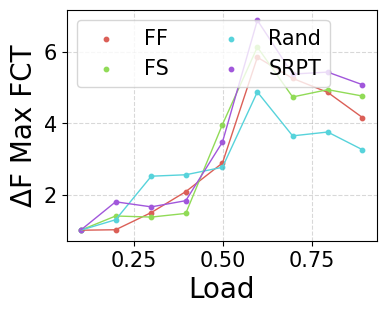

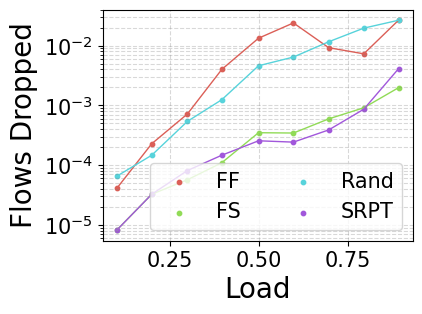

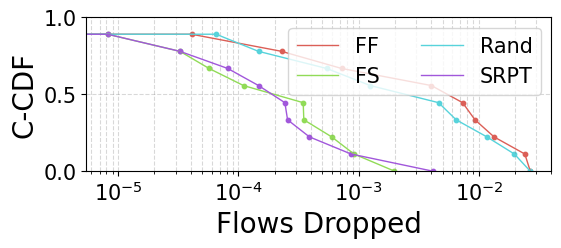

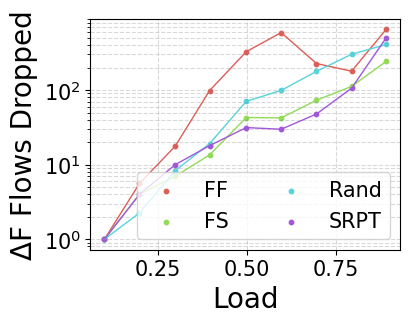

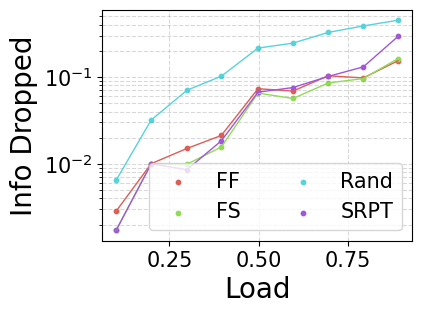

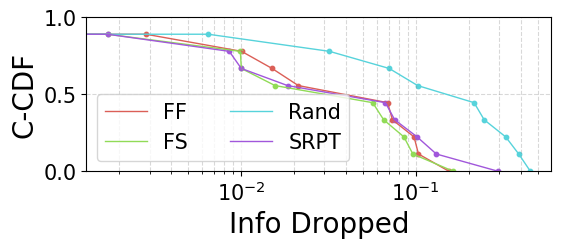

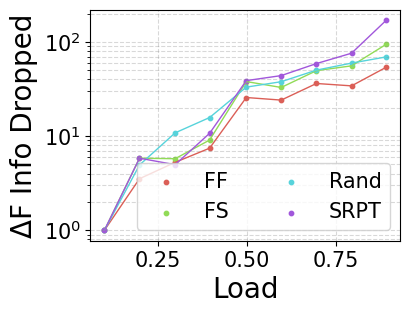

Time to plot: 2541.937218427658


In [147]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter

import time

FONT_SIZE = 20


start = time.time()
    
# plot
plotter = EnvsPlotter(time_units='\u03BCs', info_units='B', path_to_save=path_to_testbed_data)
_ = plotter.display_t_score_table(*analysers, 
                                  display_table=True, 
                                  print_latex_tables=True)
# raise Exception()
# _ = plotter.plot_t_score_scatter(*analysers, gridlines=True, figsize=(4, 3), legend_ncol=2)

# COMMENT IF HAVEN'T TRACKED QUEUE EVOLUTION AND SCHEDULER DECISION COLOUR GRID
# _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_num_flows', *analysers)
# _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_info_units', *analysers)
# _ = plotter.plot_demand_slot_colour_grid_for_different_schedulers(*analysers)

# COMMENT IF WANT TO SAVE TIME
# _ = plotter.plot_link_utilisation_vs_time_for_different_loads(*analysers, mean_period=75, figsize=(6, 2), legend_ncol=2, plot_legend=False) # mean_period=2500
# _ = plotter.plot_link_concurrent_demands_vs_time_for_different_loads(*analysers, mean_period=500)




_ = plotter.plot_demand_completion_time_vs_size_for_different_loads(*analysers, use_scientific_notation_yaxis=True, font_size=FONT_SIZE, gridlines=True, figsize=(4, 3), legend_ncol=2)
_ = plotter.plot_throughput_rate_vs_load(*analysers, plot_bar_charts=False, use_scientific_notation=True, font_size=FONT_SIZE, gridlines=True, scatter_figsize=(4,3), cdf_figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_throughput_frac_vs_load(*analysers, plot_bar_charts=False, font_size=FONT_SIZE, gridlines=True, scatter_figsize=(4,3), cdf_figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_fcts_cdf_for_different_loads(*analysers, font_size=FONT_SIZE, gridlines=True, figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_mean_fct_vs_load(*analysers, logscale=True, font_size=FONT_SIZE, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_99th_percentile_fct_vs_load(*analysers, logscale=True, font_size=FONT_SIZE, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_max_fct_vs_load(*analysers, font_size=FONT_SIZE, gridlines=True, logscale=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_fraction_of_arrived_flows_dropped_vs_load(*analysers, logscale=True, font_size=FONT_SIZE, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_fraction_of_arrived_info_dropped_vs_load(*analysers, logscale=True, font_size=FONT_SIZE, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)

if JOBCENTRIC:
    _ = plotter.plot_jcts_cdf_for_different_loads(*analysers, font_size=FONT_SIZE, gridlines=True, figsize=(6, 2), legend_ncol=2)
    _ = plotter.plot_mean_jct_vs_load(*analysers, logscale=True, font_size=FONT_SIZE, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
    _ = plotter.plot_99th_percentile_jct_vs_load(*analysers, logscale=True, font_size=FONT_SIZE, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
    _ = plotter.plot_max_jct_vs_load(*analysers, font_size=FONT_SIZE, gridlines=True, logscale=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
    _ = plotter.plot_fraction_of_arrived_jobs_dropped_vs_load(*analysers, logscale=True, font_size=FONT_SIZE, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)



end = time.time()
print('Time to plot: {}'.format(end-start))

In [ ]:
# CUSTOM RADAR PLOT(S)
%load_ext autoreload
%autoreload
import trafpy.generator as tpg

time_units = '\u03BCs'
info_units = 'B'

plot_dict = {'Mean FCT ({})'.format(time_units): {'range': [0, 1], 'classes': {'class1': 0.2,
                                                         'class2': 0.4}},
             'p99 FCT ({})'.format(time_units): {'range': [0, 100], 'classes': {'class1': 60,
                                                           'class2': 20}},
             'Max FCT ({})'.format(time_units): {'range': [1, 5], 'classes': {'class1': 2,
                                                         'class2': 5}},
             'Throughput Rate ({}/{})'.format(info_units, time_units): {'range': [0, 10], 'classes': {'class1': 7,
                                                          'class2': 3}},
             'Frac Info Dropped': {'range': [0, 10], 'classes': {'class1': 7,
                                                          'class2': 3}},
             'Frac Flows Dropped': {'range': [10, 0], 'classes': {'class1': 1,
                                                          'class2': 2}}
            }

_ = tpg.plot_radar(plot_dict)

# Custom Plots

In [ ]:
# PLOT SCHEDULER SENSITIVITY TO LOAD
%load_ext autoreload
%autoreload
import trafpy.generator as tpg

from collections import defaultdict
import sigfig


def get_summary_dict(analysers, headers, time_units='', info_units=''):
    summary_dict = {header: [] for header in headers}
    for analyser in analysers:
        # self._check_analyser_valid(analyser)
        summary_dict['Load'].append(round(analyser.load_frac, 2))
        summary_dict['Subject'].append(analyser.subject_class_name)
        summary_dict['T-Score'].append(analyser.t_score)
        summary_dict['Mean FCT ({})'.format(time_units)].append(round(analyser.mean_fct, 1))
        summary_dict['p99 FCT ({})'.format(time_units)].append(round(analyser.nn_fct, 1))
        summary_dict['Max FCT ({})'.format(time_units)].append(round(analyser.max_fct, 1))
        summary_dict['Throughput Frac'].append(round(analyser.throughput_frac, 1))
        summary_dict['Frac Flows Dropped'].append(sigfig.round(analyser.dropped_flow_frac, sigfigs=3))
        summary_dict['Frac Info Dropped'].append(sigfig.round(analyser.dropped_info_frac, sigfigs=3))
    return summary_dict



time_units = '\u03BCs'
info_units = 'B'
headers = ['Load',
           'T-Score',
           'Subject',
           'Mean FCT ({})'.format(time_units),
           'p99 FCT ({})'.format(time_units),
           'Max FCT ({})'.format(time_units),
           'Throughput Frac',
           'Frac Info Dropped',
           'Frac Flows Dropped']
dont_plot_headers = ['Load', 'T-Score', 'Subject']
plot_headers = [header for header in headers if header not in dont_plot_headers]
# determine if higher is better for each header
is_higher_better = {}
for header in headers:
    if header == 'T-Score' or header == 'Throughput Frac':
        is_higher_better[header] = True
    else:
        is_higher_better[header] = False

scheduler_to_analysers = {}
for analyser in analysers:
    if analyser.env.scheduler.scheduler_name not in scheduler_to_analysers:
        scheduler_to_analysers[analyser.env.scheduler.scheduler_name] = [analyser]
    else:
        scheduler_to_analysers[analyser.env.scheduler.scheduler_name].append(analyser)

for scheduler_name in scheduler_to_analysers.keys():
    nested_dict = lambda: defaultdict(nested_dict)
    plot_dict = nested_dict()
    
    anys = scheduler_to_analysers[scheduler_name]
    summary_dict = get_summary_dict(anys, headers, time_units=time_units, info_units=info_units)
    
    for header in plot_headers:
        min_val, max_val = min(summary_dict[header]), max(summary_dict[header])
        
#         if is_higher_better[header]:
#             # want higher (better) values on outer radar edge -> don't flip range
#             _range = [0.9*min(summary_dict[header]), 1.1*max(summary_dict[header])]
#         else:
#             # want lower (better) values on outer radar edge -> flip range
#             _range = [1.1*max(summary_dict[header]), 0.9*min(summary_dict[header])]
            
        diff = max(max_val - min_val, 1e-9)
        min_val -= (0.1*diff)
        max_val += (0.1*diff)
        _range = [min_val, max_val]
#         _range = [max(min_val, 1e-9), max(max_val, 1e-9)]
        if not is_higher_better[header]:
            # flip axis
            _range = _range[::-1]

        plot_dict[header]['range'] = _range
        for i, load in enumerate(summary_dict['Load']):
            plot_dict[header]['classes']['Load {}'.format(str(load))] = summary_dict[header][i]
        
    tpg.plot_radar(plot_dict, 
                   title=scheduler_name,
                   fill=True,
                   fill_alpha=0.05,
                   figsize=(12.8, 9.6))
        
    

In [ ]:
# %autoreload
# import trafpy
# import trafpy.generator as tpg
# from trafpy.manager import RandomAgent, RWA, Demand, DCN, EnvAnalyser
# import json

# DATA_BAME = 'artificial_light_chancap10'
# path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/benchmark_data/{}_benchmark_data.json'.format(DATA_NAME)
# benchmark_data = json.loads(tpg.load_data_from_json(path_to_benchmark_data))
# benchmarks = list(benchmark_data.keys())

# SLOT_SIZE = 1.0
# PACKET_SIZE = 1
# NUM_CHANNELS = 1
# NUM_K_PATHS = 1
# MAX_FLOWS = 10
# MAX_TIME = None

In [ ]:
# network = tpg.gen_fat_tree(k=3, N=2, num_channels=1, server_to_rack_channel_capacity=10)
# rwa = RWA(tpg.gen_channel_names(NUM_CHANNELS), NUM_K_PATHS)
# scheduler = RandomAgent(network, rwa, slot_size=SLOT_SIZE, packet_size=PACKET_SIZE)

# num_benchmark_tests = 0
# for benchmark in benchmarks:
#     for load in benchmark_data[benchmark]:
#         for repeat in benchmark_data[benchmark][load]:
#             num_benchmark_tests += 1

# for benchmark in benchmarks:
#     for load in list(benchmark_data[benchmark].keys()):
#         for repeat in benchmark_data[benchmark][load]:
#             if json.loads(load) == 0.1 and scheduler.scheduler_name == 'random':
#                 demand_data = benchmark_data[benchmark][load][repeat]
#                 demand = tpg.Demand(demand_data)
#                 env = DCN(network, demand, scheduler, num_k_paths=NUM_K_PATHS, slot_size=SLOT_SIZE, max_flows=MAX_FLOWS, max_time=MAX_TIME)
#                 print(env.slot_size)
                
#                 observation = env.reset()
#                 scheduler.register_env(env)
                
#                 while True:
#                     action = scheduler.get_action(observation)
#                     observation, reward, done, info = env.step(action)
                    
#                     if done:
#                         print('Completed')
#                         analyser = EnvAnalyser(env)
#                         analyser.compute_metrics(print_summary=True)

In [ ]:
# packet size = info
# slot size = sec
# min bandwidth in network = info per sec

# assume that 1 packet size of info can be transferred per sub slot
# info per sub slot = 1 packet = packet size
# sub slot size = (info per sub slot / min bandwidth in network) * slot size

In [ ]:
a = None
if a is not None:
    print('not none')
else:
    print('None')

In [ ]:
increment_time = 1.001
print(round(1-(increment_time-1),6))

In [ ]:
ep_link_capacity = 500
